# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [122]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from adjustText import adjust_text
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
cities

Number of cities in the list: 593


['adamstown',
 "'ohonua",
 'richland center',
 'blackmans bay',
 'brisas de zicatela',
 'kristiansund',
 'avarua',
 'invercargill',
 'hermanus',
 'quinte west',
 'stanley',
 'constantia',
 'hawaiian paradise park',
 'bengkulu',
 'hithadhoo',
 'quibala',
 'lihue',
 'port-aux-francais',
 'lebu',
 'tsiombe',
 'al kharijah',
 'slave lake',
 'edinburgh of the seven seas',
 'fale old settlement',
 'albany',
 'wailua homesteads',
 'taiohae',
 'longyearbyen',
 'san fernando de apure',
 'chibougamau',
 'vorgashor',
 'margaret river',
 'uturoa',
 'punta arenas',
 'bredasdorp',
 'kalkaman',
 'dalandzadgad',
 'waitangi',
 'melfort',
 'takamaka',
 'arinos',
 'rabak',
 'bardai',
 'kodiak',
 'kokopo',
 'puerto natales',
 'lerwick',
 "mel'nikovo",
 'anadyr',
 'the bottom',
 'saratamata',
 'durango',
 'barah',
 'iqaluit',
 'buriti bravo',
 'college',
 'georgetown',
 'grytviken',
 'nemuro',
 'saint-hilaire-de-talmont',
 'talnakh',
 'alaghsas',
 'cole harbour',
 'ilulissat',
 'tiksi',
 'holualoa',
 'fort

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 3 of Set 1 | richland center
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | brisas de zicatela
Processing Record 6 of Set 1 | kristiansund
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | invercargill
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | quinte west
Processing Record 11 of Set 1 | stanley
Processing Record 12 of Set 1 | constantia
Processing Record 13 of Set 1 | hawaiian paradise park
Processing Record 14 of Set 1 | bengkulu
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | quibala
Processing Record 17 of Set 1 | lihue
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | tsiombe
Processing Record 21 of Set 1 | al kharijah
Processing

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,24.97,78,37,5.46,PN,1738863567
1,richland center,43.3347,-90.3868,-0.01,38,96,7.81,US,1738863598
2,blackmans bay,-43.0167,147.3167,14.07,89,36,1.67,AU,1738863320
3,brisas de zicatela,15.8369,-97.0419,32.29,45,75,1.54,MX,1738863601
4,kristiansund,63.1115,7.7320,10.36,40,0,4.12,NO,1738863602


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,24.97,78,37,5.46,PN,1738863567
1,richland center,43.3347,-90.3868,-0.01,38,96,7.81,US,1738863598
2,blackmans bay,-43.0167,147.3167,14.07,89,36,1.67,AU,1738863320
3,brisas de zicatela,15.8369,-97.0419,32.29,45,75,1.54,MX,1738863601
4,kristiansund,63.1115,7.7320,10.36,40,0,4.12,NO,1738863602


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

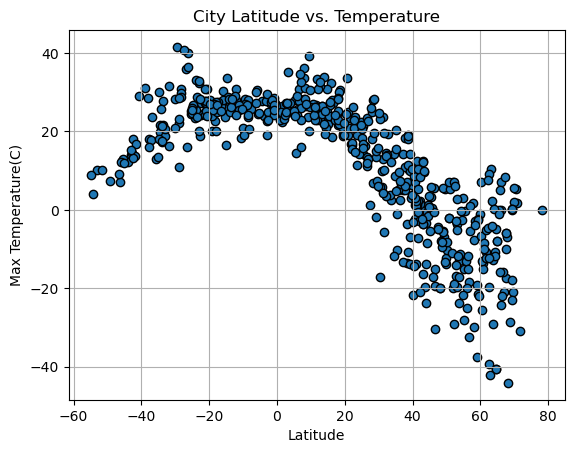

In [9]:
# Build scatter plot for latitude vs. temperature
plt.figure()
x = city_data_df['Lat']
y = city_data_df['Max Temp']
plt.scatter(x, y, marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title('City Latitude vs. Temperature')
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

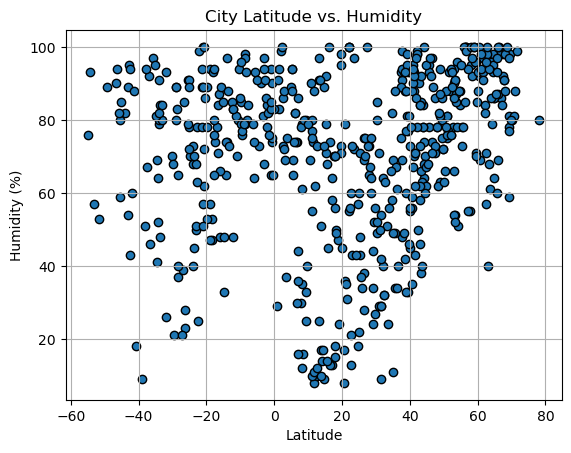

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.figure
x = city_data_df['Lat']
y = city_data_df['Humidity']
plt.scatter(x, y, marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

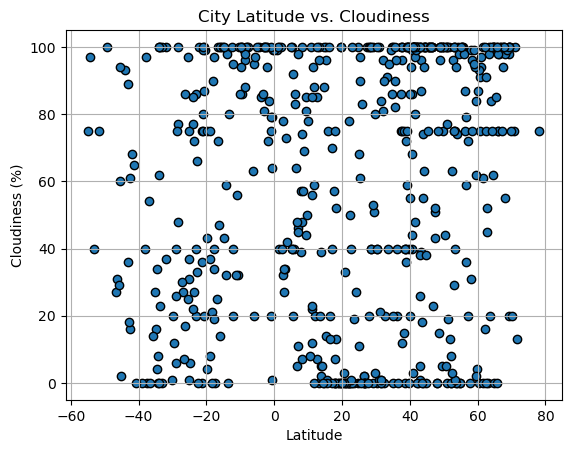

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure
x = city_data_df['Lat']
y = city_data_df['Cloudiness']
plt.scatter(x, y, marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

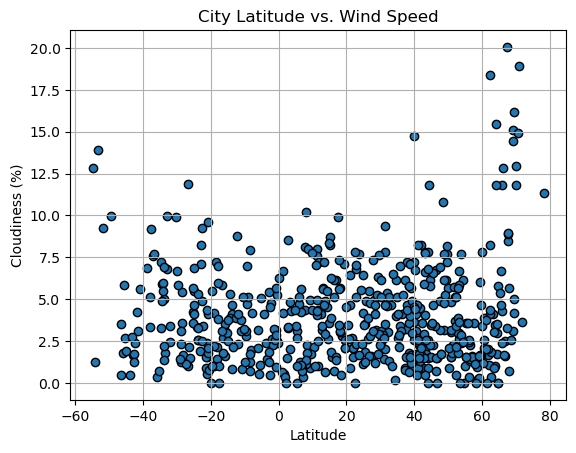

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.figure
x = city_data_df['Lat']
y = city_data_df['Wind Speed']
plt.scatter(x, y, marker='o', edgecolors='black')


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Wind Speed')
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [125]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y):
    # Perform linear regression using linregress
    slope, intercept, r_value, p_value, std_err = linregress(x, y) 
    # F-string for equation display
    formula = f"y = {slope:.2f}x + {intercept:.2f}"
    # Display the r^value
    r_square = r_value ** 2
    print(f"The r^2-value is: {r_square}")
    # Calculate line
    reg_line = slope * x + intercept
    # Make plots
    plt.scatter(x, y, marker='o', edgecolors='black')
    plt.plot(x, reg_line, color='red')
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    plt.text(x_min + 1,
              y_min + 1,
              formula,
              ha='left',
               va='bottom',
                 color='red',
                 fontsize=16)
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    plt.show()


In [93]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hem_df = city_data_df[city_data_df['Lat'] >= 0]
north_hem_df.reset_index(drop=True, inplace=True)                                     
# Display sample data
north_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,richland center,43.3347,-90.3868,-0.01,38,96,7.81,US,1738863598
1,brisas de zicatela,15.8369,-97.0419,32.29,45,75,1.54,MX,1738863601
2,kristiansund,63.1115,7.7320,10.36,40,0,4.12,NO,1738863602
3,quinte west,44.1834,-77.5662,-0.74,100,100,2.57,CA,1738863607
4,stanley,54.8680,-1.6985,3.07,88,0,1.03,GB,1738863608


In [96]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hem_df = city_data_df[city_data_df['Lat'] < 0]
south_hem_df.reset_index(drop=True, inplace=True)
# Display sample data
south_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,24.97,78,37,5.46,PN,1738863567
1,blackmans bay,-43.0167,147.3167,14.07,89,36,1.67,AU,1738863320
2,avarua,-21.2078,-159.7750,25.03,94,75,1.54,CK,1738863603
3,invercargill,-46.4000,168.3500,7.23,94,31,0.45,NZ,1738863604
4,hermanus,-34.4187,19.2345,21.56,64,0,5.92,ZA,1738863417


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.6716454019980296


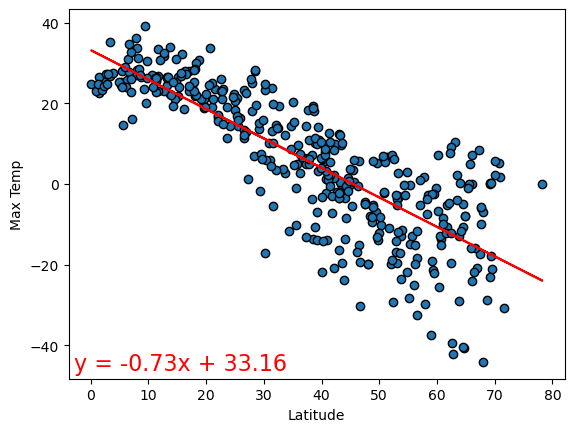

In [126]:
# Linear regression on Northern Hemisphere
plt.figure()
x = north_hem_df['Lat']
y = north_hem_df['Max Temp']
x_label = 'Latitude'
y_label = 'Max Temp'
title = 'Latitude vs. Max Temp'

# Show plot
plot_linear_regression(x,y)
plt.show()

The r^2-value is: 0.2891812318499737


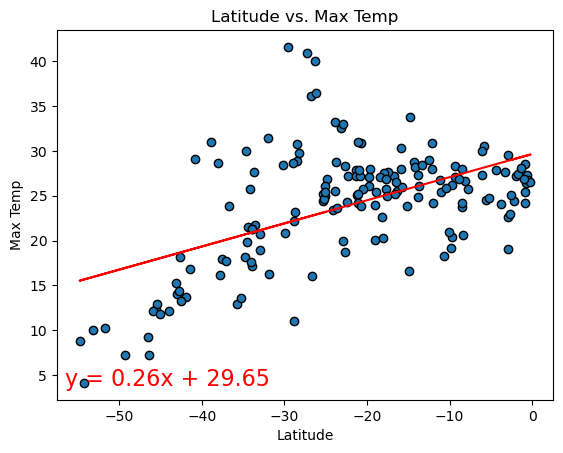

In [97]:
# Linear regression on Southern Hemisphere
plt.figure()
x = south_hem_df['Lat']
y = south_hem_df['Max Temp']
x_label = 'Latitude'
y_label = 'Max Temp'
title = 'Latitude vs. Max Temp'

# Show plot
plot_linear_regression(x,y)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.1820969644114747


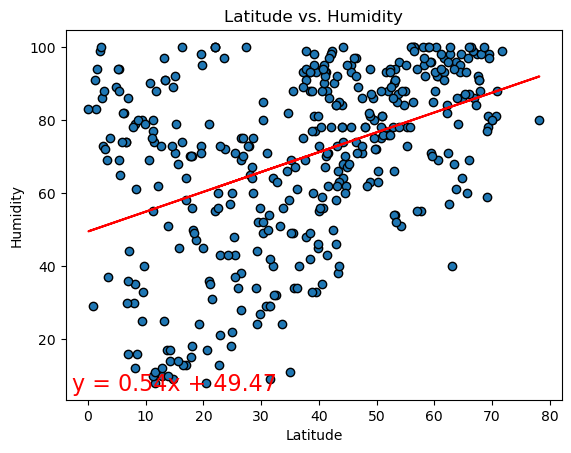

In [98]:
# Northern Hemisphere
plt.figure()
x = north_hem_df['Lat']
y = north_hem_df['Humidity']
x_label = 'Latitude'
y_label = 'Humidity'
title = 'Latitude vs. Humidity'

# Show plot
plot_linear_regression(x,y)
plt.show()

The r^2-value is: 0.03651125512079438


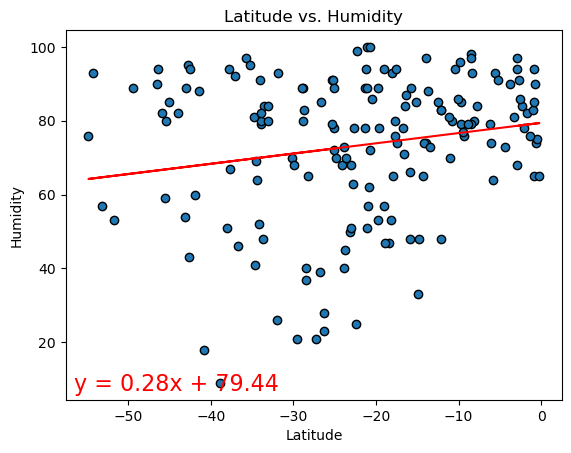

In [99]:
# Southern Hemisphere
plt.figure()
x = south_hem_df['Lat']
y = south_hem_df['Humidity']
x_label = 'Latitude'
y_label = 'Humidity'
title = 'Latitude vs. Humidity'

# Show plot
plot_linear_regression(x,y)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.05382948030076964


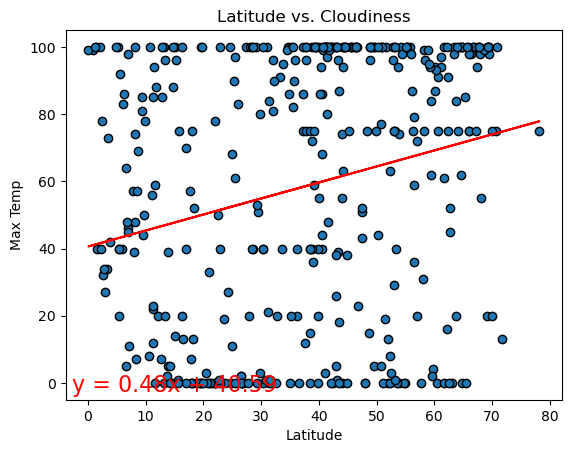

In [100]:
# Northern Hemisphere
plt.figure()
x = north_hem_df['Lat']
y = north_hem_df['Cloudiness']
x_label = 'Latitude'
y_label = 'Max Temp'
title = 'Latitude vs. Cloudiness'

# Show plot
plot_linear_regression(x,y)
plt.show()

The r^2-value is: 0.107211828529107


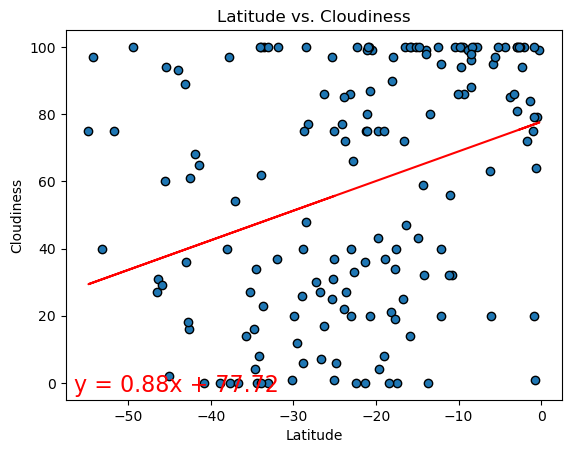

In [101]:
# Southern Hemisphere
plt.figure()
x = south_hem_df['Lat']
y = south_hem_df['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness'
title = 'Latitude vs. Cloudiness'

# Show plot
plot_linear_regression(x,y)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.01881535620084855


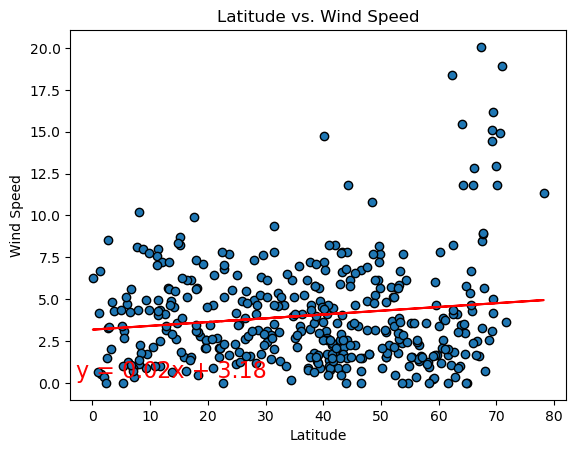

In [102]:
# Northern Hemisphere
plt.figure()
x = north_hem_df['Lat']
y = north_hem_df['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed'
title = 'Latitude vs. Wind Speed'

# Show plot
plot_linear_regression(x,y)
plt.show()

The r^2-value is: 0.06336199125235513


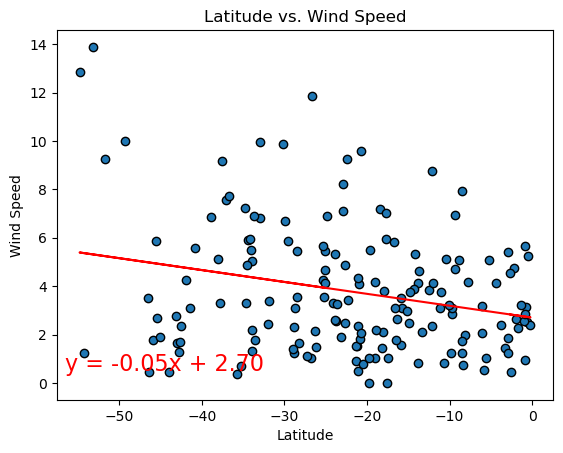

In [103]:
# Southern Hemisphere
plt.figure()
x = south_hem_df['Lat']
y = south_hem_df['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed'
title = 'Latitude vs. Wind Speed'

# Show plot
plot_linear_regression(x,y)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE